In [1]:
import numpy as np
import pandas as pd
import timeit
from statistics import mean

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import catboost as cb

In [2]:
def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Absolute Percentage Error: {mape:.4f}%')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    print(f'Coefficient of Determination: {r2:.4f}')

In [3]:
def fit_regressor(regressor, x_tr, y_tr, **kwargs):
    regressor.fit(x_tr, y_tr, **kwargs)

def predict_regressor(regressor, x_te):
    return regressor.predict(x_te)

In [4]:
df = pd.read_csv('avocado.csv', index_col=0)

In [5]:
# split dataset into x and y
X = df.drop(columns='AveragePrice')
y = df['AveragePrice']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
#CatBoost
cbr = cb.CatBoostRegressor(random_state=42, verbose=False)

In [7]:
time = timeit.repeat(lambda: fit_regressor(cbr, x_tr=X_train, y_tr=y_train, cat_features=['type','Date','region']), repeat=10, number=1)
print(f"Average fitting time: {mean(time):0.6f} seconds")

time2 = timeit.repeat(lambda: predict_regressor(cbr, x_te=X_test), repeat=10, number=1)
print(f"Average prediction time: {mean(time2):0.6f} seconds")

Average fitting time: 4.596713 seconds
Average prediction time: 0.012062 seconds


In [8]:
y_hat = cbr.predict(X_test)
regression_report(y_test, y_hat)

Mean Absolute Error: 0.0857
Mean Absolute Percentage Error: 6.1704%
Mean Squared Error: 0.0132
Root Mean Squared Error: 0.1150
Coefficient of Determination: 0.9176


In [9]:
pool_train = cb.Pool(X_train, y_train,
                  cat_features = ['type','Date','region'])
fig = cbr.plot_tree(pool=pool_train, tree_idx=0)
fig.render('../images/XGBoost_CatBoost_LightGBM/avocado_catboost_simple_dtree', format='png')

'../images/XGBoost_CatBoost_LightGBM/avocado_catboost_simple_dtree.png'

<AxesSubplot: xlabel='importance', ylabel='feature'>

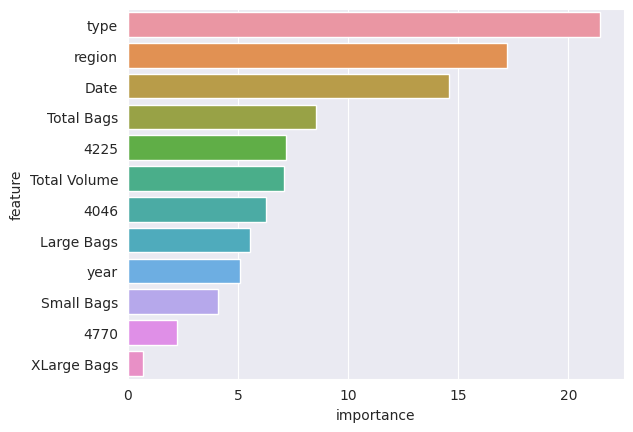

In [10]:
feature_importance = pd.DataFrame(cbr.get_feature_importance(), cbr.feature_names_).reset_index()
feature_importance.columns = ['feature', 'importance']
feature_importance.sort_values("importance", ascending=False, inplace=True)
sns.barplot(x='importance', y='feature', data=feature_importance)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


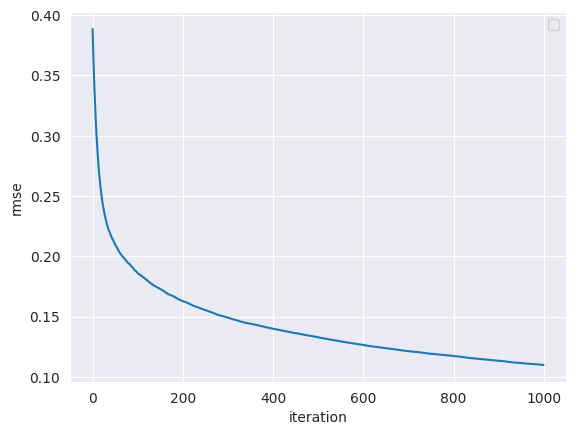

In [11]:
# Extract the training and test loss values
test_loss = cbr.evals_result_["learn"]["RMSE"]

# Plot the training and test loss
plt.plot(test_loss)
plt.xlabel('iteration')
plt.ylabel('rmse')
plt.legend()
plt.show()

In [12]:
X_1 = X[['type', 'region', 'Date', 'Total Bags']]
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.20, random_state=42)
pool_train = cb.Pool(X_train, y_train,
                  cat_features = ['type','Date','region'])

In [13]:
model = cb.CatBoost({'verbose': False})

# depth from 4 to 10 is optimal
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [3, 5, 7],
        'n_estimators': [1500, 2000, 3000]
        }

In [14]:
%%time
model.grid_search(grid, X=pool_train, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.1744119878
bestIteration = 1499


bestTest = 0.156622357
bestIteration = 1493


bestTest = 0.1741558124
bestIteration = 1499


bestTest = 0.1557298555
bestIteration = 1499


bestTest = 0.1745427951
bestIteration = 1499


bestTest = 0.156682833
bestIteration = 1499


bestTest = 0.1687233863
bestIteration = 1999


bestTest = 0.1535800544
bestIteration = 1996


bestTest = 0.1692497652
bestIteration = 1999


bestTest = 0.1535668309
bestIteration = 1999


bestTest = 0.1693107039
bestIteration = 1999


bestTest = 0.1535347031
bestIteration = 1988


bestTest = 0.1625624387
bestIteration = 2999


bestTest = 0.1504518017
bestIteration = 2993


bestTest = 0.163048418
bestIteration = 2999


bestTest = 0.15056267
bestIteration = 2997


bestTest = 0.162785739
bestIteration = 2999


bestTest = 0.1511214684
bestIteration = 2994


bestTest = 0.158278892
bestIteration = 1499


bestTest = 0.1474302575
bestIteration = 1498


bestTest = 0.1586889303
bestIteration = 1499


bestTest = 0.147025

{'params': {'depth': 10,
  'l2_leaf_reg': 7,
  'iterations': 1500,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [15]:
model.get_metadata()["params"]

'{"detailed_profile":false,"boosting_options":{"model_shrink_mode":"Constant","approx_on_full_history":false,"fold_len_multiplier":2,"fold_permutation_block":0,"posterior_sampling":false,"boosting_type":"Plain","iterations":1500,"model_shrink_rate":0,"od_config":{"wait_iterations":20,"type":"None","stop_pvalue":0},"boost_from_average":true,"permutation_count":4,"learning_rate":0.10000000149011612},"pool_metainfo_options":{"tags":{}},"metrics":{"objective_metric":{"type":"RMSE","params":{}},"eval_metric":{"type":"RMSE","params":{}},"custom_metrics":[]},"metadata":{},"cat_feature_params":{"store_all_simple_ctr":false,"ctr_leaf_count_limit":18446744073709551615,"simple_ctrs":[{"ctr_binarization":{"border_count":15,"border_type":"Uniform"},"target_binarization":{"border_count":1,"border_type":"MinEntropy"},"prior_estimation":"No","priors":[[0,1],[0.5,1],[1,1]],"ctr_type":"Borders"},{"ctr_binarization":{"border_count":15,"border_type":"Uniform"},"prior_estimation":"No","priors":[[0,1]],"ctr

In [16]:
model_2 = cb.CatBoost({'verbose': False})

grid_2 = {'learning_rate': [0.1, 0.3, 0.5],
        'depth': [10, 12],
        'l2_leaf_reg': [7],
          'n_estimators': [1500]
        }

In [17]:
%%time
model_2.grid_search(grid_2, X=pool_train, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.1417140059
bestIteration = 1074


bestTest = 0.1458819828
bestIteration = 359


bestTest = 0.154679051
bestIteration = 166


bestTest = 0.1458398461
bestIteration = 1248


bestTest = 0.1489191003
bestIteration = 272


bestTest = 0.151407834
bestIteration = 138

Training on fold [0/3]

bestTest = 0.1476497621
bestIteration = 1474

Training on fold [1/3]

bestTest = 0.1497371673
bestIteration = 1490

Training on fold [2/3]

bestTest = 0.1525496634
bestIteration = 1488

CPU times: user 13min 38s, sys: 1min 27s, total: 15min 6s
Wall time: 3min 25s


{'params': {'depth': 10,
  'l2_leaf_reg': 7,
  'iterations': 1500,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [22]:
%%time
y_hat = model_2.predict(X_test)
regression_report(y_test, y_hat)

Mean Absolute Error: 0.0970
Mean Absolute Percentage Error: 7.0142%
Mean Squared Error: 0.0177
Root Mean Squared Error: 0.1332
Coefficient of Determination: 0.8896
CPU times: user 226 ms, sys: 1.19 ms, total: 227 ms
Wall time: 49.8 ms


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


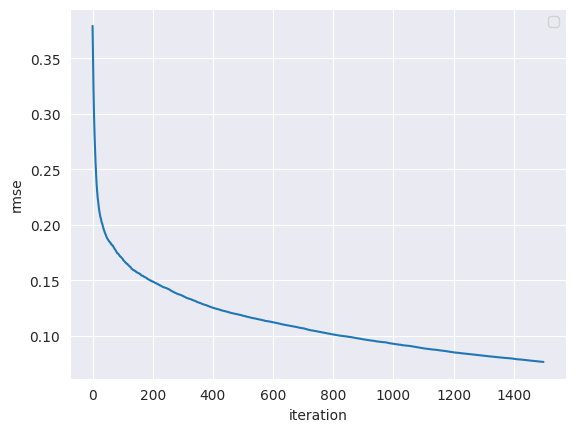

In [23]:
# Extract the training and test loss values
test_loss = model_2.evals_result_["learn"]["RMSE"]

# Plot the training and test loss
plt.plot(test_loss)
plt.xlabel('iteration')
plt.ylabel('rmse')
plt.legend()
plt.show()

In [25]:
model_2.evals_result_["learn"]["RMSE"][-20:]

[0.07700136677265644,
 0.07697368305474984,
 0.07693727099591213,
 0.07689904722545454,
 0.07687972441901893,
 0.07685179449693548,
 0.07682174273356243,
 0.07678801245107307,
 0.07678630406003188,
 0.0767689746148466,
 0.07674536663152719,
 0.0766853027588588,
 0.07663203251581766,
 0.07661213076973857,
 0.07658830803934746,
 0.07656627681215998,
 0.07654446061909558,
 0.07652488525967582,
 0.07649477200821897,
 0.07648070499673536]